## Lead Scoring Case Study
Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing all datasets
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Converted is the output variable showing if prospect convereted of not

### Step 2: Inspecting the Dataframe

In [4]:
# Let's see the head of our master dataset
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Let's check the dimensions of the dataframe
leads.shape

(9240, 37)

In [6]:
# let's look at the statistical aspects of the dataframe
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Let's see the type of each column
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

### Step 3: Data Cleansing & Preparation

#### Step 3a: Categorical Variables handling

#### Handling the Select statement - which could be due to a non mandatory selection field that end user did not select. We will convert this to null as it means no selection was made

In [8]:
leads = leads.replace('Select', np.nan)

In [9]:
# Check the null values in percentages to drop columns which arent meaningfull due to more than 40% nulls
round(leads.isnull().sum()/len(leads.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
How did you hear about X Education               78.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

In [10]:
#Drop Columns with >40% nulls
leads=leads.drop(columns=['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']) 

In [11]:
#Validate that all relevant columns are dropped
round(leads.isnull().sum()/len(leads.index),2)*100

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   37.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

#### We will now handle 6 columns with high nulls - Country, Specialization,  What is your current occupation, What matters most to you in choosing a course, Tags, City                                                                                         

In [12]:
# Country has 27% nulls, lets check how is the data distribution
leads['Country'].value_counts()


India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Kuwait                     4
Sweden                     3
China                      2
Ghana                      2
Netherlands                2
Asia/Pacific Region        2
Italy                      2
Bangladesh                 2
Belgium                    2
Philippines                2
Uganda                     2
Switzerland                1
Kenya                      1
Vietnam                    1
Malaysia                   1
Tanzania                   1
Sri Lanka                  1
Liberia       

In [13]:
# Replace all nulls with India as it is occuring with unusually high freq
leads['Country']=leads['Country'].replace(np.nan,'India')

In [14]:
# Specialization has 37% nulls, lets check how is the data distribution
leads['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

In [15]:
## As data is fairly spread accross, it is tough to estimate this field hence we can club all nulls as others
leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Others')

In [16]:
## What is your current occupation has 29% nulls, lets check how is the data distribution
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [17]:
# Replace all nulls with Unemployed as it is occuring with unusually high freq
leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [18]:
 ## What matters most to you in choosing a course has 29% nulls, lets check how is the data distribution
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [19]:
# Replace all nulls with Better Career Prospect as it is occuring with unusually high freq
leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospect')

In [20]:
## Tags has 36% nulls, lets check how is the data distribution
leads['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

In [21]:
# Replace all nulls with 'Will revert after reading the email' as it is occuring with unusually high freq
leads['Tags'] = leads['Tags'].replace(np.nan, 'Will revert after reading the email')

In [22]:
## City has 40% nulls, lets check how is the data distribution
leads['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [23]:
# Replace all nulls with 'Mumbai' as it is occuring with unusually high freq
leads['City'] = leads['City'].replace(np.nan, 'Mumbai')

In [24]:
## Recheck that the nulls are handled
round(leads.isnull().sum()/len(leads.index),2)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      1.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             1.0
Last Activity                                    1.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [25]:
##Now we have under 5% nulls in anyfield so we can drop the columns with nulls

leads.dropna(inplace = True)

In [26]:
## Recheck that the rows with nulls are dropped
round(leads.isnull().sum()/len(leads.index),2)*100

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                            

In [27]:
#lets check dataset 
leads.shape

(9074, 30)

#### Converting  binary variables (Yes/No) to 0/1

In [28]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
            'A free copy of Mastering The Interview','Digital Advertisement', 'Search', 'Magazine', 'Newspaper Article',
           'X Education Forums', 'Newspaper', 'Through Recommendations', 'Receive More Updates About Our Courses']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

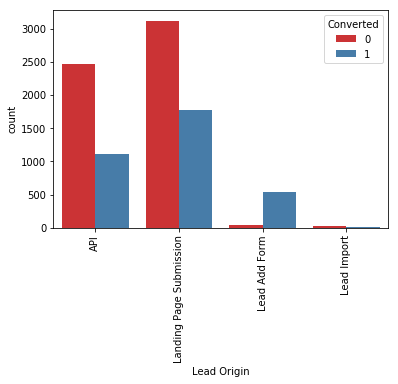

In [29]:
#### Checking for the remaining categorical columns for data distribution based on output variables
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

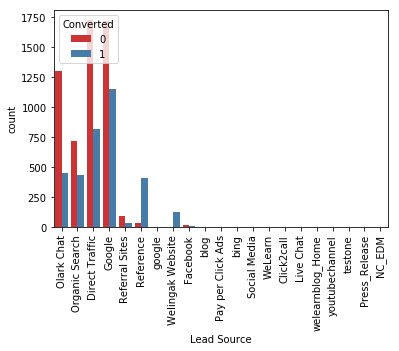

In [30]:
sns.countplot(x = "Lead Source", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

In [31]:
## Clean up by having a single entry for google and also create "others" categories for all categories with low values
leads['Lead Source'] = leads['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')
leads['Lead Source'] = leads['Lead Source'].replace(['google'], 'Google')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

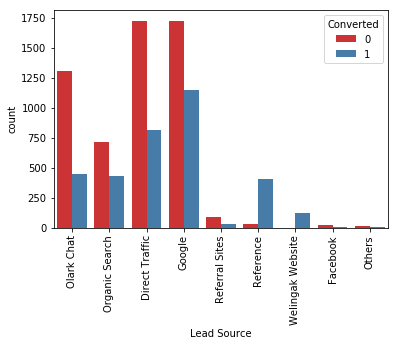

In [32]:
## Revisualize lead sourc

sns.countplot(x = "Lead Source", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

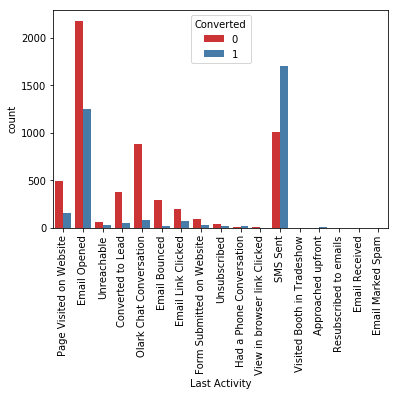

In [33]:
sns.countplot(x = "Last Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

In [34]:
## create "others" categories for all categories with low values
leads['Last Activity'] = leads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

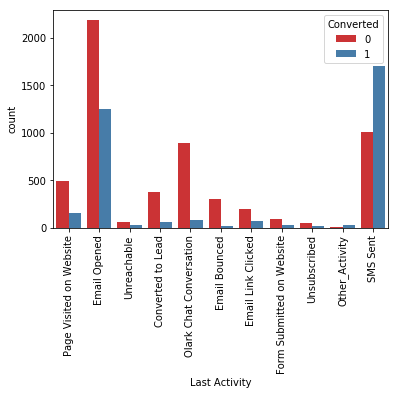

In [35]:
## Revisualize Last Activity
sns.countplot(x = "Last Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

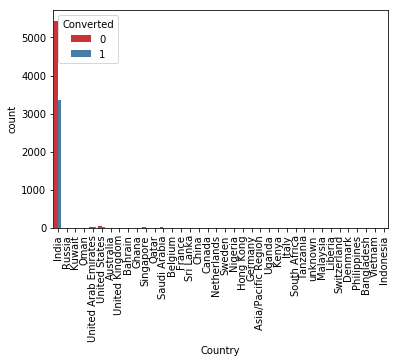

In [36]:
sns.countplot(x = "Country", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

### We can drop country as it is heavily skewed towards India hence wont add value in model

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

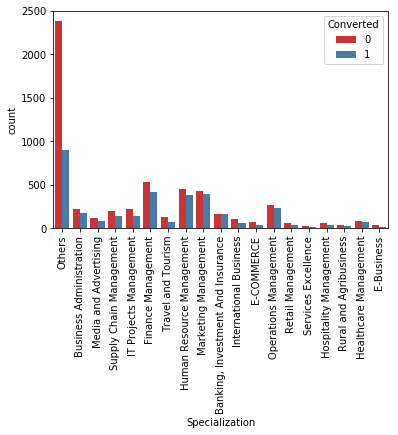

In [37]:
sns.countplot(x = "Specialization", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

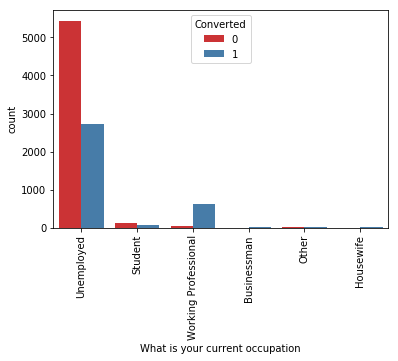

In [38]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

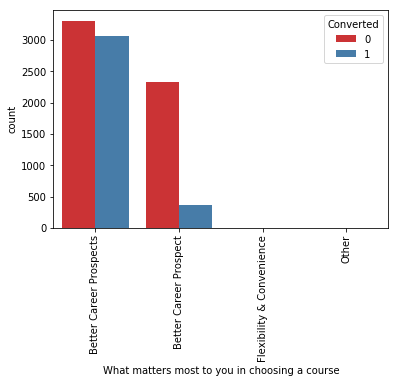

In [39]:
sns.countplot(x = "What matters most to you in choosing a course", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

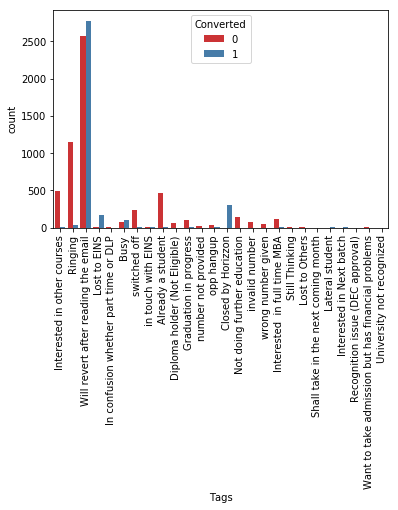

In [40]:
sns.countplot(x = "Tags", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

### Can drop this as this seems like comments column hence not useful for model Building

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

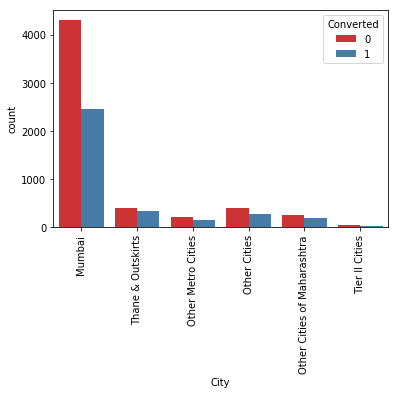

In [41]:
sns.countplot(x = "City", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

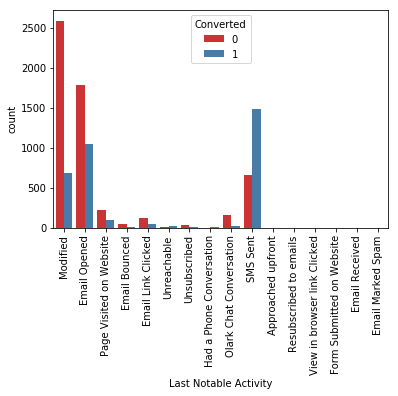

In [42]:
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)


(array([0, 1]), <a list of 2 Text xticklabel objects>)

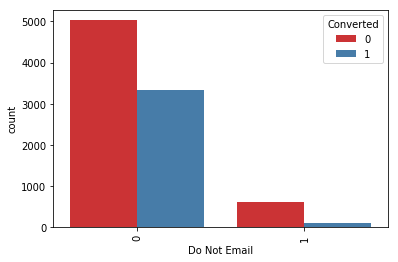

In [43]:
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

#### Can be dropped as data is skewed

(array([0, 1]), <a list of 2 Text xticklabel objects>)

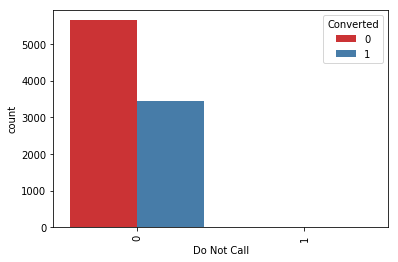

In [44]:
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

#### Can be dropped as data is skewed

(array([0, 1]), <a list of 2 Text xticklabel objects>)

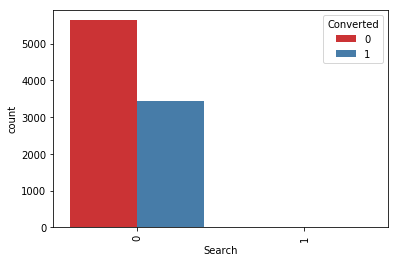

In [45]:
sns.countplot(x = "Search", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

#### Can be dropped as data is skewed

(array([0]), <a list of 1 Text xticklabel objects>)

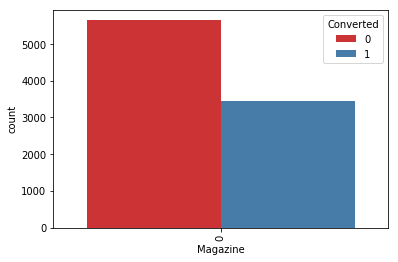

In [46]:
sns.countplot(x = "Magazine", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

#### Can be dropped as data is skewed

(array([0, 1]), <a list of 2 Text xticklabel objects>)

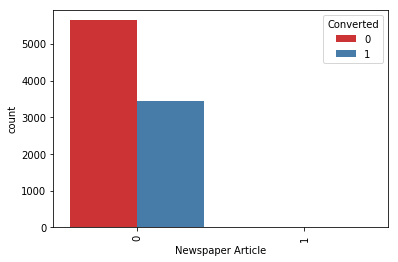

In [47]:
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

#### Can be dropped as data is skewed

(array([0, 1]), <a list of 2 Text xticklabel objects>)

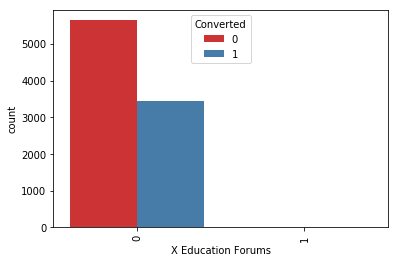

In [48]:
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

#### Can be dropped as data is skewed

(array([0, 1]), <a list of 2 Text xticklabel objects>)

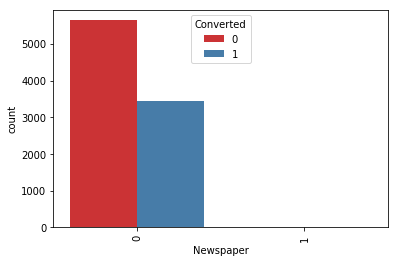

In [49]:
sns.countplot(x = "Newspaper", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

#### Can be dropped as data is skewed

(array([0, 1]), <a list of 2 Text xticklabel objects>)

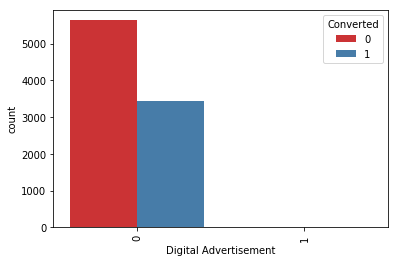

In [50]:
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

#### Can be dropped as data is skewed

(array([0, 1]), <a list of 2 Text xticklabel objects>)

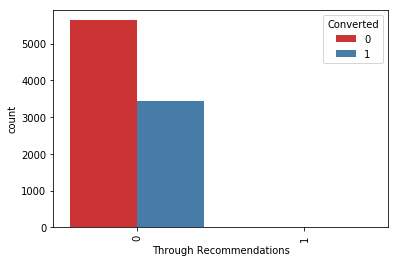

In [51]:
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads,palette='Set1')
plt.xticks(rotation = 90)

#### Can be dropped as data is skewed

In [52]:
## As per above analysis, drop 'country','tags', ,'Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'
## Drop lead nos  as they are lead identifier and wont affect model
## Also drop columns that are part of subsciptions options chosen by leads
leads = leads.drop(['Lead Number', 'Tags','Country','Receive More Updates About Our Courses',
                            'Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque',
                            'A free copy of Mastering The Interview','Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'],1)

In [53]:
leads.shape

(9074, 13)

#### For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [54]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'City', 'Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)

#### Dropping the repeated variables

In [55]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'City', 'Last Notable Activity'], 1)

In [56]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 72 columns):
Prospect ID                                                                9074 non-null object
Converted                                                                  9074 non-null int64
TotalVisits                                                                9074 non-null float64
Total Time Spent on Website                                                9074 non-null int64
Page Views Per Visit                                                       9074 non-null float64
Lead Origin_Landing Page Submission                                        9074 non-null uint8
Lead Origin_Lead Add Form                                                  9074 non-null uint8
Lead Origin_Lead Import                                                    9074 non-null uint8
Lead Source_Facebook                                                       9074 non-null uint8
Lead Source_Google               

All variables are numeric and dropped the variables that are not required

#### Step 3b: Numerical Variables Handling

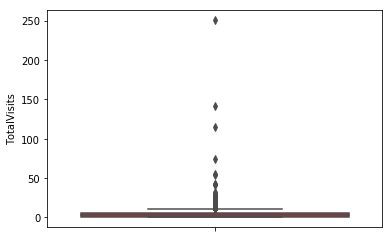

In [57]:
sns.boxplot(leads['TotalVisits'],orient='vert',palette='Set1')

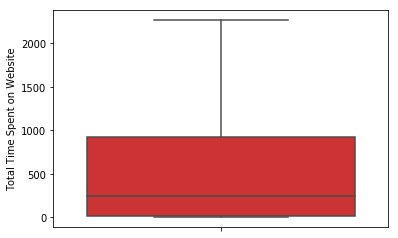

In [58]:
sns.boxplot(leads['Total Time Spent on Website'],orient='vert',palette='Set1')

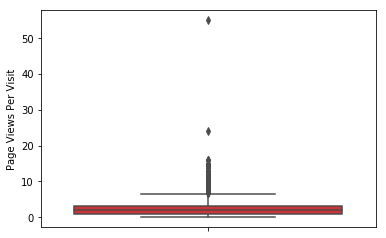

In [59]:
sns.boxplot(leads['Page Views Per Visit'],orient='vert',palette='Set1')

From the distribution shown above,we can see the outliers for 2 variables hence we can limit upto 95%

In [60]:
percentiles = leads['Page Views Per Visit'].quantile([0.05,0.95]).values
leads['Page Views Per Visit'][leads['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads['Page Views Per Visit'][leads['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

In [61]:
percentiles = leads['TotalVisits'].quantile([0.05,0.95]).values
leads['TotalVisits'][leads['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads['TotalVisits'][leads['TotalVisits'] >= percentiles[1]] = percentiles[1]

In [62]:
leads.shape

(9074, 72)

### Step 4: Test-Train Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Putting feature variable to X
X = leads.drop(['Prospect ID','Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [65]:
# Putting response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [66]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Step 5: Feature Scaling

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

C:\Users\fgf8167\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\fgf8167\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.432779,-0.160255,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,-0.432779,-0.540048,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,-1.150329,-0.888650,-1.265540,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4750,-0.432779,1.643304,-0.155018,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0.643547,2.017593,0.122613,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [69]:
### Checking the conversion Rate
churn = (sum(leads['Converted'])/len(leads['Converted'].index))*100
churn

37.85541106458012

We have almost 37% conversion rate

### Model Building

In [70]:
import statsmodels.api as sm

###  Feature Selection Using RFE

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [72]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [73]:
rfe.support_

array([False,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False,  True,  True, False, False, False,
        True,  True, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False,  True, False, False,
       False,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False])

In [74]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 21),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 20),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 6),
 ('Lead Source_Facebook', False, 28),
 ('Lead Source_Google', False, 18),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 35),
 ('Lead Source_Others', False, 17),
 ('Lead Source_Reference', False, 3),
 ('Lead Source_Referral Sites', False, 44),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 26),
 ('Last Activity_Email Opened', False, 11),
 ('Last Activity_Form Submitted on Website', False, 31),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Other_Activity', True, 1),
 ('Last Activity_Page Visited on Website', False, 29),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 27),
 ('Last Activ

In [76]:
col = X_train.columns[rfe.support_]

In [77]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_Unreachable',
       'Last Activity_Unsubscribed', 'Specialization_Business Administration',
       'Specialization_E-Business', 'Specialization_E-COMMERCE',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operati

##### Assessing the model with StatsModels

In [78]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2583.5
Date:                Mon, 15 Jan 2024   Deviance:                       5166.9
Time:                        19:22:32   Pearson chi2:                 6.29e+03
No. Iterations:                    21   Covariance Type:             nonrobust
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.5035      0.148    -10.131      0.000      -1.794      -1.213
Total Time Spent on Website                                               1.1177      0.041     27.545      0.000       1.038       1.197
Lead Origin_Landing Page Submission                                      -1.0194      0.128     -7.964      0.000      -1.270      -0.769
Lead Origin_Lead Add Form                                                 3.0203      0.232     13.011      0.000       2.565       3.475
Lead Source_Olark Chat                                                    1.3039      0.124     10.517      0.000       1.061       1.547
Lead Source_Welingak Website                                              2.4728      0.759      3.257      0.001       0.985       3.961
Last Activity_Email Bounced                                              -2.0350      0.381     -5.342      0.000      -2.782      -1.288
Last Activity_Olark Chat Conversation                                    -1.3162      0.168     -7.834      0.000      -1.645      -0.987
Last Activity_Other_Activity                                              1.1769      0.538      2.188      0.029       0.123       2.231
Last Activity_SMS Sent                                                    1.2708      0.075     16.980      0.000       1.124       1.417
Specialization_Others                                                    -0.9113      0.126     -7.248      0.000      -1.158      -0.665
What is your current occupation_Housewife                                22.7794   1.53e+04      0.001      0.999      -3e+04    3.01e+04
What is your current occupation_Working Professional                      2.3886      0.191     12.519      0.000       2.015       2.763
What matters most to you in choosing a course_Better Career Prospects     1.2358      0.089     13.959      0.000       1.062       1.409
Last Notable Activity_Had a Phone Conversation                            2.4161      1.249      1.934      0.053      -0.032       4.864
Last Notable Activity_Unreachable                                         2.0350      0.491      4.143      0.000       1.072       2.998
=========================================================================================================================================
"""

In [79]:
## Dropping column with p> 0.05
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [80]:
## Retrain the model
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2587.8
Date:                Mon, 15 Jan 2024   Deviance:                       5175.5
Time:                        20:17:14   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.4986      0.148    -10.107      0.000      -1.789      -1.208
Total Time Spent on Website                                               1.1169      0.041     27.558      0.000       1.037       1.196
Lead Origin_Landing Page Submission                                      -1.0196      0.128     -7.974      0.000      -1.270      -0.769
Lead Origin_Lead Add Form                                                 3.0352      0.232     13.088      0.000       2.581       3.490
Lead Source_Olark Chat                                                    1.3028      0.124     10.511      0.000       1.060       1.546
Lead Source_Welingak Website                                              2.4566      0.759      3.236      0.001       0.968       3.945
Last Activity_Email Bounced                                              -2.0394      0.381     -5.354      0.000      -2.786      -1.293
Last Activity_Olark Chat Conversation                                    -1.3187      0.168     -7.849      0.000      -1.648      -0.989
Last Activity_Other_Activity                                              1.1730      0.538      2.180      0.029       0.118       2.228
Last Activity_SMS Sent                                                    1.2657      0.075     16.922      0.000       1.119       1.412
Specialization_Others                                                    -0.9159      0.126     -7.289      0.000      -1.162      -0.670
What is your current occupation_Working Professional                      2.3832      0.191     12.492      0.000       2.009       2.757
What matters most to you in choosing a course_Better Career Prospects     1.2380      0.088     13.990      0.000       1.065       1.411
Last Notable Activity_Had a Phone Conversation                            2.4135      1.249      1.932      0.053      -0.035       4.862
Last Notable Activity_Unreachable                                         2.0302      0.491      4.133      0.000       1.067       2.993
=========================================================================================================================================
"""

In [81]:
## Dropping column with p>0.05
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [82]:
## Retrain the model
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2590.1
Date:                Mon, 15 Jan 2024   Deviance:                       5180.3
Time:                        20:19:04   Pearson chi2:                 6.31e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.4935      0.148    -10.083      0.000      -1.784      -1.203
Total Time Spent on Website                                               1.1153      0.040     27.539      0.000       1.036       1.195
Lead Origin_Landing Page Submission                                      -1.0203      0.128     -7.990      0.000      -1.271      -0.770
Lead Origin_Lead Add Form                                                 3.0330      0.232     13.080      0.000       2.578       3.487
Lead Source_Olark Chat                                                    1.2995      0.124     10.483      0.000       1.057       1.542
Lead Source_Welingak Website                                              2.4607      0.759      3.241      0.001       0.973       3.949
Last Activity_Email Bounced                                              -2.0391      0.381     -5.355      0.000      -2.785      -1.293
Last Activity_Olark Chat Conversation                                    -1.3153      0.168     -7.829      0.000      -1.645      -0.986
Last Activity_Other_Activity                                              1.8181      0.463      3.923      0.000       0.910       2.726
Last Activity_SMS Sent                                                    1.2653      0.075     16.923      0.000       1.119       1.412
Specialization_Others                                                    -0.9231      0.126     -7.354      0.000      -1.169      -0.677
What is your current occupation_Working Professional                      2.3756      0.190     12.479      0.000       2.002       2.749
What matters most to you in choosing a course_Better Career Prospects     1.2365      0.088     13.981      0.000       1.063       1.410
Last Notable Activity_Unreachable                                         2.0286      0.491      4.130      0.000       1.066       2.991
=========================================================================================================================================
"""

In [84]:
## Dropping Last Notable Activity_Unreachable as it is counterintuitive that if lead was last unreachable 
## it has a higher chance of conversion
col = col.drop('Last Notable Activity_Unreachable', 1)
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_SMS Sent', 'Specialization_Others',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_Better Career Prospects'],
      dtype='object')

In [85]:
## Retrain the model
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2598.8
Date:                Mon, 15 Jan 2024   Deviance:                       5197.6
Time:                        20:24:57   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Covariance Type:             nonrobust
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.4580      0.147     -9.888      0.000      -1.747      -1.169
Total Time Spent on Website                                               1.1104      0.040     27.508      0.000       1.031       1.190
Lead Origin_Landing Page Submission                                      -1.0274      0.127     -8.062      0.000      -1.277      -0.778
Lead Origin_Lead Add Form                                                 3.0183      0.232     13.034      0.000       2.564       3.472
Lead Source_Olark Chat                                                    1.2865      0.124     10.404      0.000       1.044       1.529
Lead Source_Welingak Website                                              2.4603      0.759      3.240      0.001       0.972       3.948
Last Activity_Email Bounced                                              -2.0558      0.381     -5.401      0.000      -2.802      -1.310
Last Activity_Olark Chat Conversation                                    -1.3306      0.168     -7.927      0.000      -1.660      -1.002
Last Activity_Other_Activity                                              1.7982      0.463      3.884      0.000       0.891       2.706
Last Activity_SMS Sent                                                    1.2469      0.074     16.741      0.000       1.101       1.393
Specialization_Others                                                    -0.9302      0.125     -7.423      0.000      -1.176      -0.685
What is your current occupation_Working Professional                      2.3792      0.190     12.514      0.000       2.007       2.752
What matters most to you in choosing a course_Better Career Prospects     1.2266      0.088     13.908      0.000       1.054       1.400
=========================================================================================================================================
"""

In [86]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.065173
1012    0.024319
9226    0.595110
4750    0.642526
7987    0.902790
1281    0.732272
2880    0.030354
4971    0.958101
7536    0.856243
1248    0.886085
dtype: float64

In [87]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06517252, 0.02431941, 0.59510995, 0.64252553, 0.90278984,
       0.73227201, 0.03035354, 0.95810124, 0.85624349, 0.88608513])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [88]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.065173,3009
1,0,0.024319,1012
2,0,0.595110,9226
3,1,0.642526,4750
4,1,0.902790,7987


##### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [89]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted
0,0,0.065173,3009,0
1,0,0.024319,1012,0
2,0,0.595110,9226,1
3,1,0.642526,4750,1
4,1,0.902790,7987,1


In [90]:
from sklearn import metrics

In [91]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3452  453]
 [ 722 1724]]


#### Predicted     not_churn    churn
### Actual
### not_churn        3452      453
### churn            722       1724  

In [92]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.814989765391277


#### Checking VIFs

In [93]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What matters most to you in choosing a course_...,2.99
1,Lead Origin_Landing Page Submission,2.31
9,Specialization_Others,2.26
3,Lead Source_Olark Chat,2.06
2,Lead Origin_Lead Add Form,1.75
8,Last Activity_SMS Sent,1.61
6,Last Activity_Olark Chat Conversation,1.46
4,Lead Source_Welingak Website,1.36
0,Total Time Spent on Website,1.31
10,What is your current occupation_Working Profes...,1.22


## As the VIF is below 5, we can try to make prediction using current model

## Metrics beyond simply accuracy

In [95]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7048242027800491

In [97]:
# Let us calculate specificity
TN / float(TN+FP)

0.8839948783610756

In [98]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11600512163892446


In [99]:
# positive predictive value 
print (TP / float(TP+FP))

0.7919154800183739


In [100]:
# Negative predictive value
print (TN / float(TN+ FN))

0.827024436990896


### Step 9: Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [101]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [102]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

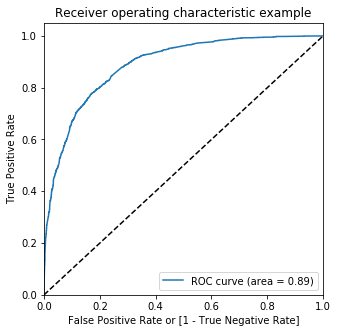

In [103]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [104]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.065173,3009,0,1,0,0,0,0,0,0,0,0,0
1,0,0.024319,1012,0,1,0,0,0,0,0,0,0,0,0
2,0,0.595110,9226,1,1,1,1,1,1,1,0,0,0,0
3,1,0.642526,4750,1,1,1,1,1,1,1,1,0,0,0
4,1,0.902790,7987,1,1,1,1,1,1,1,1,1,1,1


In [105]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.581956  0.988144  0.327529
0.2   0.2  0.759565  0.917007  0.660948
0.3   0.3  0.792159  0.845871  0.758515
0.4   0.4  0.809636  0.766966  0.836364
0.5   0.5  0.814990  0.704824  0.883995
0.6   0.6  0.796253  0.599346  0.919590
0.7   0.7  0.783026  0.525348  0.944430
0.8   0.8  0.757833  0.422731  0.967734
0.9   0.9  0.709652  0.260834  0.990781


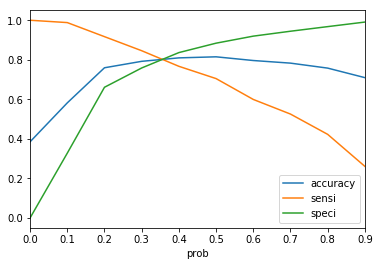

In [106]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [107]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.065173,3009,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.024319,1012,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.595110,9226,1,1,1,1,1,1,1,0,0,0,0,1
3,1,0.642526,4750,1,1,1,1,1,1,1,1,0,0,0,1
4,1,0.902790,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [108]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8014485907731066

In [109]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3137,  768],
       [ 493, 1953]], dtype=int64)

In [110]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [111]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7984464431725266

In [112]:
# Let us calculate specificity
TN / float(TN+FP)

0.8033290653008963

In [113]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.1966709346991037


In [114]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7177508269018743


In [115]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8641873278236915


## Precision and Recall

#Looking at the confusion matrix again

In [116]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3452,  453],
       [ 722, 1724]], dtype=int64)

##### Precision
TP / TP + FP

In [117]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7919154800183739

##### Recall
TP / TP + FN

In [118]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7048242027800491

Using sklearn utilities for the same

In [119]:
from sklearn.metrics import precision_score, recall_score

In [120]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7919154800183739

In [121]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7048242027800491

### Precision and recall tradeoff

In [122]:
from sklearn.metrics import precision_recall_curve

In [123]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       1
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       1
 10      0
 11      0
 12      0
 13      1
 14      1
 15      0
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

In [124]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

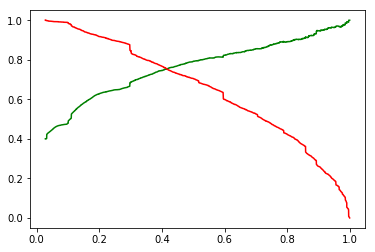

In [125]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step 11: Making predictions on the test set

In [126]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

C:\Users\fgf8167\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [127]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Other_Activity,Last Activity_SMS Sent,Specialization_Others,What is your current occupation_Working Professional,What matters most to you in choosing a course_Better Career Prospects
3271,-0.600595,0,0,0,0,0,0,0,0,1,0,0
1490,1.887326,1,0,0,0,0,0,0,0,0,1,1
7936,-0.752879,0,0,0,0,0,0,0,0,1,0,0
4216,-0.888650,0,1,0,0,0,0,0,0,0,0,1
3830,-0.587751,1,0,0,0,0,0,0,0,0,0,0


In [128]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [129]:
y_test_pred = res.predict(X_test_sm)

In [130]:
y_test_pred[:10]

3271    0.045000
1490    0.961441
7936    0.038267
4216    0.858167
3830    0.041565
1800    0.571634
6507    0.323926
4821    0.298171
4223    0.892535
4714    0.301216
dtype: float64

In [131]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [132]:
# Let's see the head
y_pred_1.head()

,0
3271,0.045000
1490,0.961441
7936,0.038267
4216,0.858167
3830,0.041565


In [133]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [134]:
# Putting Prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [135]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [136]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [137]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.045000
1,1,1490,0.961441
2,0,7936,0.038267
3,1,4216,0.858167
4,0,3830,0.041565


In [138]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [139]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

In [140]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.045000
1,1490,1,0.961441
2,7936,0,0.038267
3,4216,1,0.858167
4,3830,0,0.041565


In [141]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [142]:
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,3271,0,0.045000,0
1,1490,1,0.961441,1
2,7936,0,0.038267,0
3,4216,1,0.858167,1
4,3830,0,0.041565,0


In [143]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8185824458318032

In [144]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1483,  251],
       [ 243,  746]], dtype=int64)

In [145]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [146]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7542972699696663

In [147]:
# Let us calculate specificity
TN / float(TN+FP)

0.8552479815455594